В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm

In [350]:
pd.__version__

'2.3.0'

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [351]:
cars_data = pd.read_csv('cars.csv', sep=',')
cars_data.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [352]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [353]:
# Виводимо кількість унікальних значень для кожної категоріальної колонки
col_object = cars_data.select_dtypes(include=['object'])
for col in col_object:
    print(col, cars_data[col].nunique())

Brand 11
Model 58
Fuel_Type 2
Transmission 2
Owner_Type 3


In [354]:
# Аналізуємо які значення має кожна категоріальна колонка
cars_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [355]:
cars_data['Transmission'].value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [356]:
cars_data['Owner_Type'].value_counts()

Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64

In [357]:
cars_data['Brand'].value_counts()

Brand
Ford          11
Tata          11
Hyundai       11
BMW           10
Toyota        10
Audi          10
Volkswagen    10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

In [358]:
'''unique_list = []
for col in cars_data.columns:
    item = (col, cars_data[col].nunique(),cars_data[col].dtypes)
    unique_list.append(item) 
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts)
'''

"unique_list = []\nfor col in cars_data.columns:\n    item = (col, cars_data[col].nunique(),cars_data[col].dtypes)\n    unique_list.append(item) \nunique_counts = pd.DataFrame(\n    unique_list,\n    columns=['Column_Name', 'Num_Unique', 'Type']\n).sort_values(by='Num_Unique',  ignore_index=True)\ndisplay(unique_counts)\n"

**Відповідь 2.** В наборі даних 8 числових і 5 категоріальних колонок, з них
- 2 бінарні (мають лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонка, в якій можна встановити відношення порядку перший - другий - третій

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

**Відповідь 3.** Визначаємо вхідні дані і таргет

In [359]:
X, y = cars_data.drop(columns='Price'), cars_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

**Відповідь 4.1**

In [360]:
cars_data.Fuel_Type.value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [361]:
cars_data.Transmission.value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [362]:
# Кодуємо бінарні категоріальні признаки
Fuel_Type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_codes'] = X_train['Fuel_Type'].map(Fuel_Type_codes)
X_test['Fuel_Type_codes'] = X_test['Fuel_Type'].map(Fuel_Type_codes)
Transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['Transmission_codes'] = X_train['Transmission'].map(Transmission_codes)
X_test['Transmission_codes'] = X_test['Transmission'].map(Transmission_codes)
#X_train.head()

In [363]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


**Завдання 4.2.Кодуємо Brand методом OneHotEncoding**

In [364]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [365]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
#one_hot
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test
X_train.head()


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [366]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [367]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

**Відповідь 4.3**
Метод OrdinalEncoder кодує наступним чином: перетворює вказані тектові значення на послідовні числові значення. У нашому випадку на значення 1, 2, 3 - який за рахунком власник

Очікуваний результат після трансформацій:

In [368]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

**Відповідь 5**

In [369]:
col_number = X_train.select_dtypes(exclude=['object'])
col_number.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [370]:
model_train = pd.concat([col_number, y_train], axis=1)
corr_matrix = model_train.corr()['Price']
corr_matrix

Car_ID                0.025560
Year                 -0.233769
Kilometers_Driven    -0.083951
Mileage              -0.638404
Engine                0.710561
Power                 0.849137
Seats                 0.000979
Fuel_Type_codes      -0.110782
Transmission_codes    0.680731
Audi                  0.328858
BMW                   0.477522
Ford                 -0.004592
Honda                -0.209779
Hyundai              -0.263022
Mahindra             -0.178627
Maruti               -0.249737
Mercedes              0.431606
Tata                 -0.341815
Toyota               -0.023778
Volkswagen           -0.158742
Owner_Type_Codes     -0.265537
Price                 1.000000
Name: Price, dtype: float64

Найбільшу кореляцію з цільовою змінною мають об'єм двигуна (0,71) і потужність авто (0,85). Вони найбільшим позитивним чином впливають на вартість автомобіля в прямому напрямку - чим більше ознака, тим більше цільова знака. Трохи меньше значення у кореляціі з трансміссією (0,68), але тут два значення і зрозуміло, що автоматизована коробка завжди додає вартості.
У паливной єфективності негативна залежність (-0,63) - при збільшенні витрати пального ціна зменшується.
Ознаки дійсно мають сильний вплив на ціну авто.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [371]:
# 0
X_train = X_train.drop(columns = X_train.select_dtypes(include=['object']))
X_test = X_test.drop(columns = X_test.select_dtypes(include=['object']))

# 1
model = LinearRegression().fit(X_train, y_train)

# 2
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
loss_train = root_mean_squared_error(predictions_train, y_train)
loss_test = root_mean_squared_error(predictions_test, y_test)
print('Train Loss:', round(loss_train,))
print('Test Loss:', round(loss_test,))


Train Loss: 210294
Test Loss: 258182


In [372]:
# 3
predictions_train_df = pd.Series(predictions_train, name='Price_prediction')
model_train_prediction = pd.concat([col_number, y_train, predictions_train_df], axis=1)
predictions_test_df = pd.Series(predictions_test, name='Price_prediction')
model_test_prediction = pd.concat([col_number, y_test, predictions_test_df], axis=1)

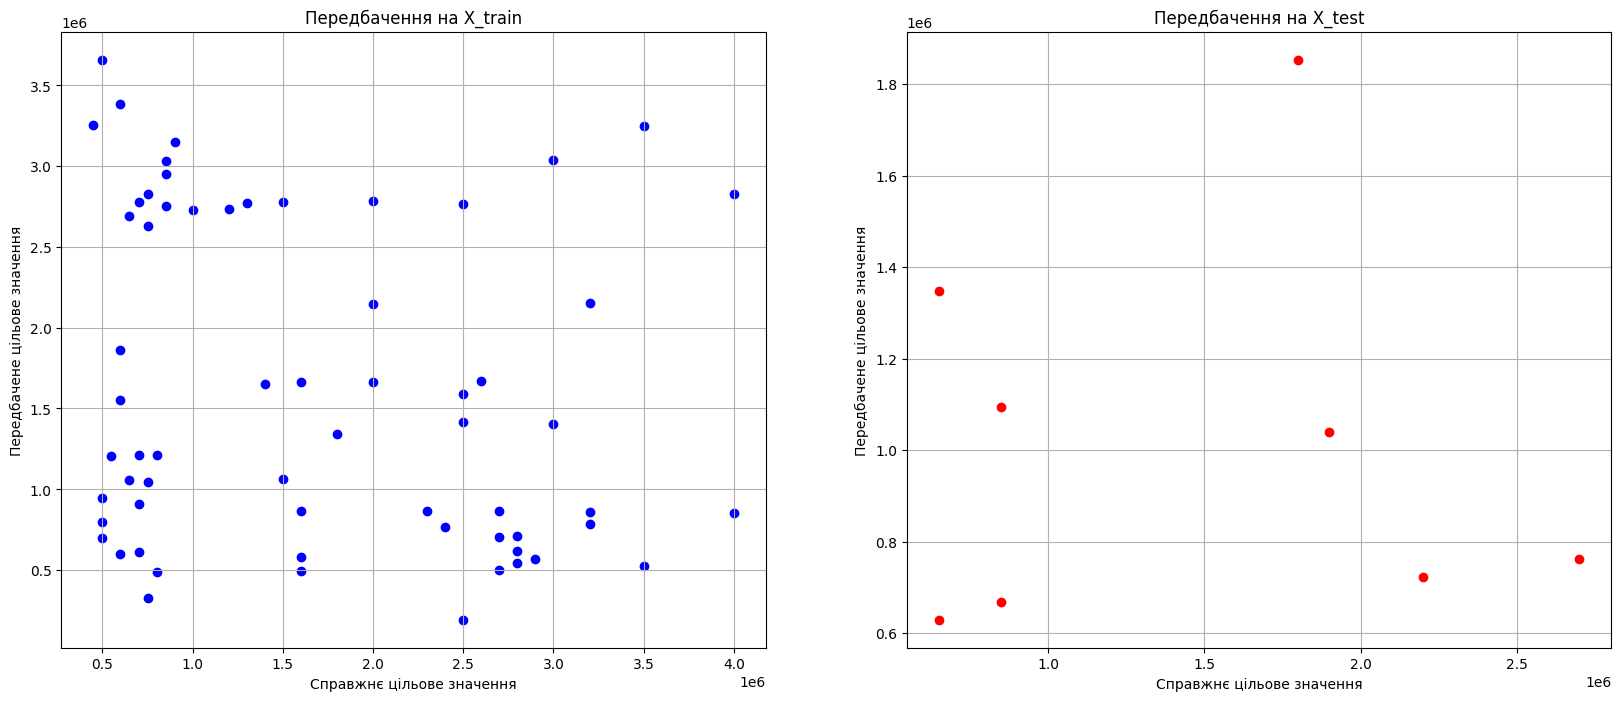

In [373]:
plt.subplots(1,2 ,figsize = (20,8))

plt.subplot(121)
plt.grid(True)
plt.scatter(model_train_prediction.Price, model_train_prediction.Price_prediction, color='blue', label='Data points')
plt.title('Передбачення на X_train')
plt.xlabel('Справжнє цільове значення')
plt.ylabel('Передбачене цільове значення')

plt.subplot(122)
plt.grid(True)
plt.scatter(model_test_prediction.Price, model_test_prediction.Price_prediction, color='red', label='Data points')
plt.title('Передбачення на X_test')
plt.xlabel('Справжнє цільове значення')
plt.ylabel('Передбачене цільове значення')
plt.grid(True)
plt.show()

Я не дуже зрозуміла яку залежність нужно продемонструвати на графіках, ідея була - по осі x віобразити значення справжньої цільової змінной, а по y передбаченної. Тоді, якщо вони дуже схожі, то графік був би схож на пряму по діагонали, проте все виглядає дуже дивно.


In [374]:
cars_data.shape

(100, 13)

In [375]:
cars_data.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


Дуже маленька вибірка, великий розкід цільової ознаки, модель поганої якості.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

**Відповідь 7.1**

In [376]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])
scaled_inputs_train = scaler.transform(X_train[numeric_cols])
scaled_inputs_test = scaler.transform(X_test[numeric_cols])


In [377]:
X_train.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Fuel_Type_codes', 'Transmission_codes', 'Audi', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes'],
      dtype='object')

**Відповідь 7.2**

In [378]:
cat_cols = ['Seats', 'Fuel_Type_codes', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes']
categorical_data_train = X_train[cat_cols].values
categorical_data_test = X_test[cat_cols].values
inputs_train = np.concatenate((scaled_inputs_train, categorical_data_train), axis=1)
inputs_test = np.concatenate((scaled_inputs_test, categorical_data_test), axis=1)

# Тренуємо
model = LinearRegression().fit(inputs_train, y_train)

# Передбачаємо
predictions_train = model.predict(inputs_train)
predictions_test = model.predict(inputs_test)
loss_train = root_mean_squared_error(predictions_train, y_train)
loss_test = root_mean_squared_error(predictions_test, y_test)
print('Train Loss:', round(loss_train,))
print('Test Loss:', round(loss_test,))

Train Loss: 210343
Test Loss: 259601


In [379]:
model.coef_.round()

array([ -11604.,  -99714., -131885.,  -24683.,  500001.,   -2353.,
       -370608.,  236368.,  758803.,  730327., -305098., -189003.,
       -505043., -574913., -394216.,  733975., -126504.,  130458.,
       -258785.,   66278.])

In [380]:
column_names = numeric_cols + cat_cols
X_train_scaled = pd.DataFrame(inputs_train, columns=column_names)
X_train_scaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,0.568813,-0.693871,0.274862,-0.628491,-0.231967,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.323442,-0.039533,-0.018324,0.087196,0.247012,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.323442,-0.039533,-0.604696,0.111560,0.910213,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.215697,0.396692,0.274862,-0.476217,-0.784634,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-1.215697,-0.257646,-1.484254,0.122219,0.910213,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [381]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,1,1.616570e+06
8,Audi,7.588030e+05
15,Mercedes,7.339747e+05
9,BMW,7.303268e+05
4,Power,5.000005e+05
7,Transmission_codes,2.363676e+05
17,Toyota,1.304575e+05
19,Owner_Type_Codes,6.627831e+04
5,Seats,-2.353012e+03
0,Year,-1.160426e+04


Коефіцієнти якісь дивні – дуже великі за модулем, може я неправильно порахувала. Зрозуміло, що найбільші значним чином впливають на цільову ознаку. Першими позитивні - марки самих дорогих автомобілів, які значною мірою впливають на ціну. Зазвичай це називають "ціна за бренд". Далі йдуть суцільні технічні характеристики автомобіля - потужність автомобіля, трансмісія, власник за рахунком, там же стабільна та якісна Toyota. А ось інші характеристики - кілометраж, рік випуску, а також економічні та практичні бренди - дають негативний вплив.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

**Відповідь 8**

In [382]:
Y = y_train
X = inputs_train
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params


const    1.481856e+06
x1      -1.160426e+04
x2      -9.971396e+04
x3      -1.318846e+05
x4      -2.468308e+04
x5       5.000005e+05
x6      -2.353012e+03
x7      -3.706075e+05
x8       2.363676e+05
x9       8.935172e+05
x10      8.650410e+05
x11     -1.703840e+05
x12     -5.428833e+04
x13     -3.703291e+05
x14     -4.401984e+05
x15     -2.595021e+05
x16      8.686889e+05
x17      8.210004e+03
x18      2.651717e+05
x19     -1.240710e+05
x20      6.627831e+04
dtype: float64

In [383]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.34e-34
Time:                        02:08:32   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.482e+06   2.83e+05      5.237      0.0

Є стат значущі коефіцієнти: х3 (0,026) паливна ефективність, х5 - потужність, х7 - тип палива, х8 - трансміссія, також по брендам Audi, BMW, Mercedes, Toyota, а також с негативним, але стат значущим коефіцієнтом - Hyundai	Mahindra	Maruti

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

**Відповідь 9**

In [384]:
X_train_scaled.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Fuel_Type_codes', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Honda',
       'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes'],
      dtype='object')

In [385]:
X_train_stat = X_train_scaled.copy()
X_train_stat['Price'] = y_train
X_train_stat = X_train_stat.drop(columns = ['Year', 'Kilometers_Driven','Engine', 'Seats', 'Ford', 'Honda', 'Tata', 'Volkswagen', 'Owner_Type_Codes'])
y_train_stat = X_train_stat['Price']
X_train_stat = X_train_stat.drop(columns = 'Price')
X_train_stat.head()

,Mileage,Power,Fuel_Type_codes,Transmission_codes,Audi,BMW,Hyundai,Mahindra,Maruti,Mercedes,Toyota
0,0.274862,-0.231967,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.018324,0.247012,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.604696,0.910213,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.274862,-0.784634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.484254,0.910213,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [386]:
Y = y_train_stat
X = X_train_stat
X = sm.add_constant(X)
X
#odel = sm.OLS(Y,X)
#results = model.fit()
#rint(results.summary())

,const,Mileage,Power,Fuel_Type_codes,Transmission_codes,Audi,BMW,Hyundai,Mahindra,Maruti,Mercedes,Toyota
0,1.0,0.274862,-0.231967,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-0.018324,0.247012,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.604696,0.910213,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.274862,-0.784634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-1.484254,0.910213,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.0,1.740791,-1.140798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76,1.0,-2.070625,2.801564,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,1.0,-0.604696,-0.330219,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78,1.0,0.274862,0.247012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Очевидно, що проблема у розмірності цільової ознаки та датафрейму, що виходить після видалення стовпців. З цієї причини не вдається застосувати статметод. У мене недостатня швидка дія пітоном, щоб швидко це зробити. Перегляну оригінальне рішення завдань 9 та 10.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?